<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/TensorFlow/_002_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Architecture of a Neural Network Regression Model

A neural network regression model is designed to predict continuous values. The architecture typically consists of several key components:

## 1. Input Layer

- **Purpose**: Accepts the input features for the model.
- **Example**: For a dataset with 10 features, the input layer will have 10 neurons.

## 2. Hidden Layers

- **Purpose**: Extract and learn features from the input data.
- **Neurons per Hidden Layer**: The number of neurons in each hidden layer can vary based on the complexity of the problem and dataset. Common choices include 32, 64, 128, or more neurons.
- **Activation Functions**: Define the output of each neuron.
  - **ReLU (Rectified Linear Unit)**: `f(x) = max(0, x)` - Commonly used for hidden layers.
  - **Sigmoid**: `f(x) = 1 / (1 + exp(-x))` - Often used for binary classification, less common in regression.
  - **Tanh**: `f(x) = tanh(x)` - Useful for normalizing outputs between -1 and 1.
- **Example**: A hidden layer with 64 neurons using ReLU activation.

## 3. Output Layer

- **Purpose**: Produces the final output of the model.
- **For Regression**: Typically consists of a single neuron with no activation function or a linear activation function.
- **Example**: A single neuron for predicting a continuous value.

## 4. Loss Function

- **Purpose**: Measures how well the model's predictions match the actual values.
- **Common Loss Functions**:
  - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
  - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.

## 5. Optimizer

- **Purpose**: Updates the model weights to minimize the loss function.
- **Common Optimizers**:
  - **Stochastic Gradient Descent (SGD)**: Updates weights using the gradient of the loss function.
  - **Adam Optimizer**: An advanced optimizer that adapts learning rates.

## 6. Training Process

- **Purpose**: Adjusts the model weights using backpropagation and optimization algorithms.
- **Steps**:
  1. **Forward Pass**: Compute predictions using current weights.
  2. **Compute Loss**: Calculate the error between predictions and actual values.
  3. **Backward Pass**: Compute gradients of the loss with respect to each weight.
  4. **Update Weights**: Adjust weights to minimize the loss.


## **fashion mnist dataset**

In [39]:
fashion_mnist = keras.datasets.fashion_mnist

( train_image , train_label ) , ( test_image , test_label ) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
train_image.shape , test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [42]:
train_image[0].shape

(28, 28)

In [78]:
def plot_image(image):
    #plt.figure(figsize=(3,3))
    plt.imshow(image)
    plt.colorbar()
    plt.axis('off')
    plt.show()

In [60]:
class_names = [
    'T-shirt/top',   # 0
    'Trouser',       # 1
    'Pullover',      # 2
    'Dress',         # 3
    'Coat',          # 4
    'Sandal',        # 5
    'Shirt',         # 6
    'Sneaker',       # 7
    'Bag',           # 8
    'Ankle boot'     # 9
]


Ankle boot


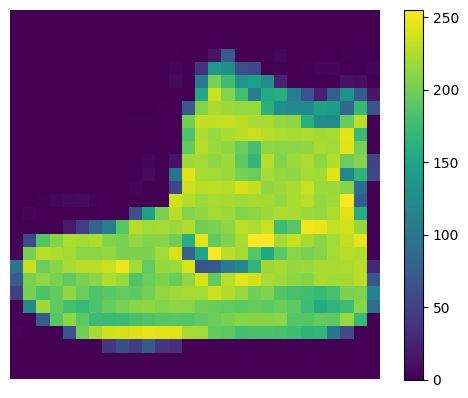

In [79]:
print(class_names[train_label[0]])
plot_image(train_image[0])

T-shirt/top


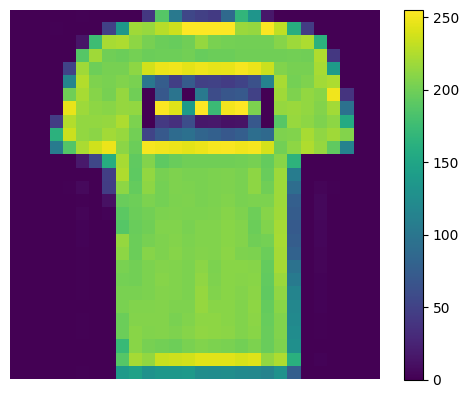

In [80]:
print(class_names[train_label[1]])
plot_image(train_image[1])

## **data preprocessing**

In [83]:
train_image =  train_image/255
test_image = test_image/255

T-shirt/top


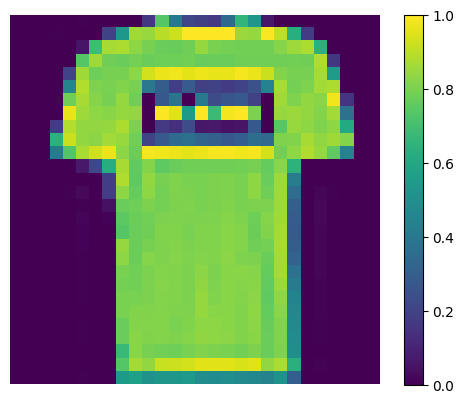

In [84]:
print(class_names[train_label[1]])
plot_image(train_image[1])

## **model building**

In [91]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # softmax return most probable class
])

In [92]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **train the  model**

In [93]:
model.fit(train_image,train_label,epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7776 - loss: 0.6276
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8612 - loss: 0.3851
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8788 - loss: 0.3338
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8842 - loss: 0.3132
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8915 - loss: 0.2966
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8966 - loss: 0.2799
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9017 - loss: 0.2636
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9075 - loss: 0.2540
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9061 - loss: 0.2505
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9141 - loss: 0.2325
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9143 - loss: 0.2283
Epoch 12/100
1875

## **evaluating the model**

In [94]:
test_loss , test_acc = model.evaluate(test_image,test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.7746


## **make predictions**

In [95]:
predictions = model.predict(test_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [97]:
predictions[0]

array([5.4952303e-37, 3.1974809e-33, 4.0976181e-34, 4.1103304e-34,
       0.0000000e+00, 7.5297686e-21, 3.3421848e-34, 3.6260788e-09,
       3.3310538e-38, 9.9999994e-01], dtype=float32)

In [98]:
np.argmax(predictions[0])

9

prediction :: Ankle boot
actual result :: Ankle boot


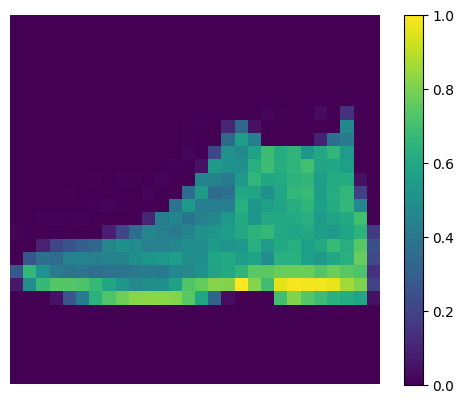

In [104]:
print(f"prediction :: {class_names[9]}")
print(f"actual result :: {class_names[test_label[0]]}")
plot_image(test_image[0])

In [107]:
def predict_n(n):
   class_n = np.argmax(predictions[n])
   pred_name= class_names[class_n]
   actual_name = class_names[test_label[n]]
   print(f"prediction :: {pred_name}")
   print(f"actual result :: {actual_name}")
   plot_image(test_image[n])

prediction :: Ankle boot
actual result :: Ankle boot


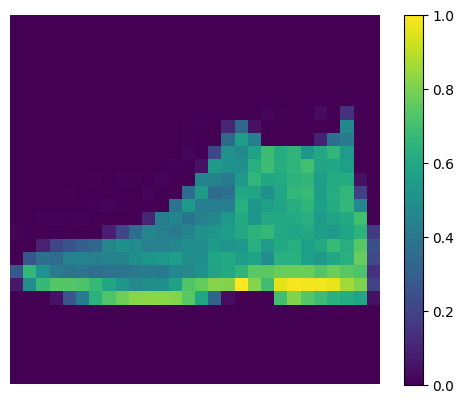

In [108]:
predict_n(0)

prediction :: Trouser
actual result :: Trouser


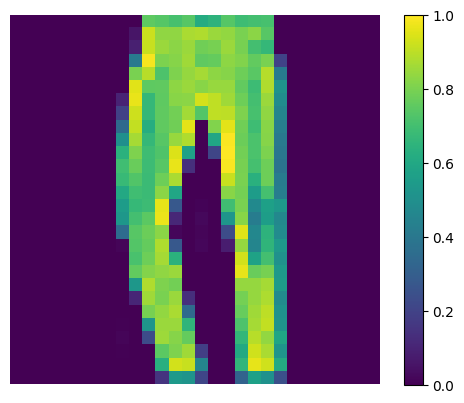

In [109]:
predict_n(5)

prediction :: Pullover
actual result :: Pullover


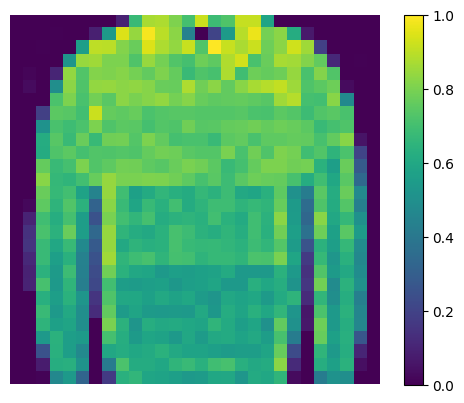

In [110]:
predict_n(20)